# A look to egamma manpower

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
plt.rcParams['image.cmap'] = 'coolwarm'
%matplotlib inline

## Import the data

In [410]:
data_list = (('egamma', ('egamma_calibration', 'photon_id', 'tp', 'egamma')),
             )#('higgs', ('HSG1', 'HSG3')))

df = []
df_meeting = []              
              
for group, subgroups in data_list:
    contributions = pd.concat([pd.read_pickle(s + "_contributions.pkl") for s in subgroups])
    meeting = pd.concat([pd.read_pickle(s + '_meeting.pkl') for s in subgroups])
    joined = contributions.join(meeting, on='id_meeting', lsuffix='_contribution')
    meeting['group'] = group
    joined['group'] = group
    df.append(joined)
    df_meeting.append(meeting)
              
df = pd.concat(df)
df_meeting = pd.concat(df_meeting)              
              
df_meeting_grouped_by_mytitle = df_meeting.groupby('my_title')
df_meeting_grouped_by_mytitle_not_null = df_meeting[df_meeting['contributions'] > 0].groupby('my_title')
df_grouped_by_group = df.groupby('group')

In [4]:
df.head()

,duration,id_meeting,speaker,title_contribution,contributions,date_meeting,my_title,title,group
id_contribution,,,,,,,,,
354974,10,354974,"MASTRANDREA, Paolo",Introduction,3,2014-11-27,egamma_calibration,EGamma Calibration,egamma
354974,20,354974,"GOUDET, Christophe Raymond",8 TeV electron calibration with template method,3,2014-11-27,egamma_calibration,EGamma Calibration,egamma
354974,20,354974,"LUZI, Pierre Marc",Updates on photon scales with Z->mumugamma events,3,2014-11-27,egamma_calibration,EGamma Calibration,egamma
345682,20,345682,"GUILLEMIN, Thibault",Update on tools validation,3,2014-10-16,egamma_calibration,EGamma Calibration,egamma
345682,5,345682,"TURRA, Ruggero",Introduction,3,2014-10-16,egamma_calibration,EGamma Calibration,egamma


## Full period

In [155]:
print "Time range: {}, {}".format(df['date_meeting'].min(), df['date_meeting'].max())

Time range: 2014-01-07 00:00:00, 2016-03-31 00:00:00


## Total number of contributions

In [418]:
total_count = df_meeting.groupby(('my_title'))['contributions'].sum()
pd.DataFrame(total_count)

,contributions
my_title,
egamma,544
egamma_calibration,174
photon_id,110
tp,493


In [156]:
df_meeting.groupby(('my_title', df_meeting['date_meeting'].dt.year))['contributions'].sum().unstack()

,2014,2015,2016
my_title,,,
egamma,251,249,44
egamma_calibration,26,131,17
photon_id,7,80,23
tp,130,291,72


### Normalized to egamma plenary

In [419]:
pd.DataFrame(total_count / total_count['egamma'])

,contributions
my_title,
egamma,1.000000
egamma_calibration,0.319853
photon_id,0.202206
tp,0.906250


### Subgroup fractions

In [420]:
total_count_not_plenary = total_count[total_count.index != 'egamma']
pd.DataFrame(total_count_not_plenary / total_count_not_plenary.sum())

,contributions
my_title,
egamma_calibration,0.223938
photon_id,0.141570
tp,0.634492


## Number of contributions per months
Number of contributions, as in the indico meeting page, grouped by months

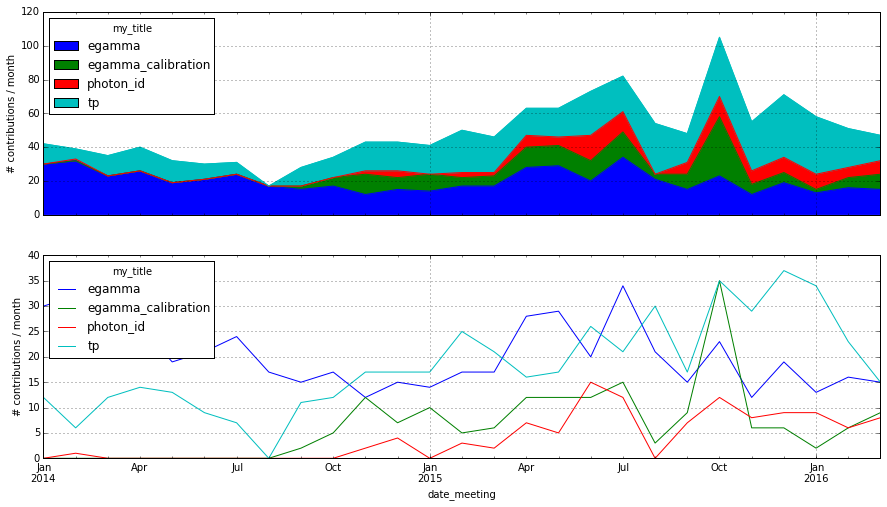

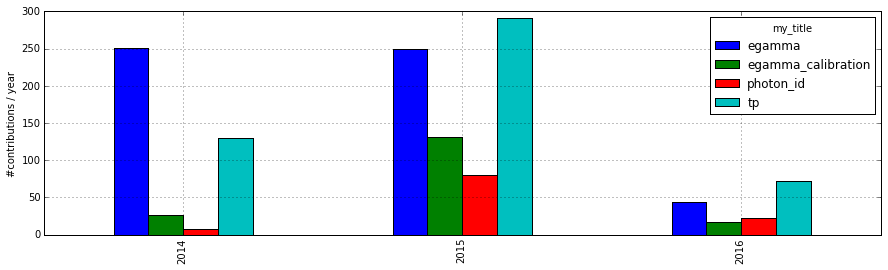

In [448]:
f, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
df_meeting.groupby([pd.Grouper(freq='MS',key='date_meeting'), 'my_title'])['contributions'].sum().unstack().fillna(0).plot(kind='area', ax=axs[0])
df_meeting.groupby([pd.Grouper(freq='MS',key='date_meeting'), 'my_title'])['contributions'].sum().unstack().fillna(0).plot(ax=axs[1])

for ax in axs: ax.set_ylabel('# contributions / month')
f, ax = plt.subplots(figsize=(15, 4))
df_meeting.groupby([df_meeting['date_meeting'].dt.year, 'my_title'])['contributions'].sum().unstack().fillna(0).plot(kind='bar', ax=ax)

ax.set_ylabel('#contributions / year')
plt.show()

## Number of minutes
Sum of the duration of each contribution, grouped per months

In [630]:
total_minutes = df.groupby(('my_title'))['duration'].sum()
pd.DataFrame(total_minutes)

,duration
my_title,
egamma,8771
egamma_calibration,3095
photon_id,2025
tp,8845


In [633]:
df.groupby(('my_title', df['date_meeting'].dt.year))['duration'].sum().unstack()

,2014,2015,2016
my_title,,,
egamma,4095,3901,775
egamma_calibration,445,2370,280
photon_id,110,1510,405
tp,2545,5180,1120


## Normalized to egamma plenary

In [631]:
pd.DataFrame(total_minutes / total_minutes['egamma'])

,duration
my_title,
egamma,1.000000
egamma_calibration,0.352867
photon_id,0.230874
tp,1.008437


### Subgroup fractions

In [632]:
total_minutes_not_plenary = total_minutes[total_minutes.index != 'egamma']
pd.DataFrame(total_minutes_not_plenary / total_minutes_not_plenary.sum())

,duration
my_title,
egamma_calibration,0.221625
photon_id,0.145005
tp,0.633369


In [670]:
df_no_plenary = df[df['my_title'] != 'egamma']
d1 = pd.DataFrame(df_no_plenary.groupby(('my_title', df_no_plenary['date_meeting'].dt.year))['duration'].sum())
d1.index.names = ['my_title', 'year']

d2 = pd.DataFrame(df_no_plenary.groupby((df_no_plenary['date_meeting'].dt.year))['duration'].sum())
d2.index.names = ['year']

(d1 / d2).unstack()

duration                    
year                    2014      2015      2016
my_title                                        
egamma_calibration  0.143548  0.261589  0.155125
photon_id           0.035484  0.166667  0.224377
tp                  0.820968  0.571744  0.620499

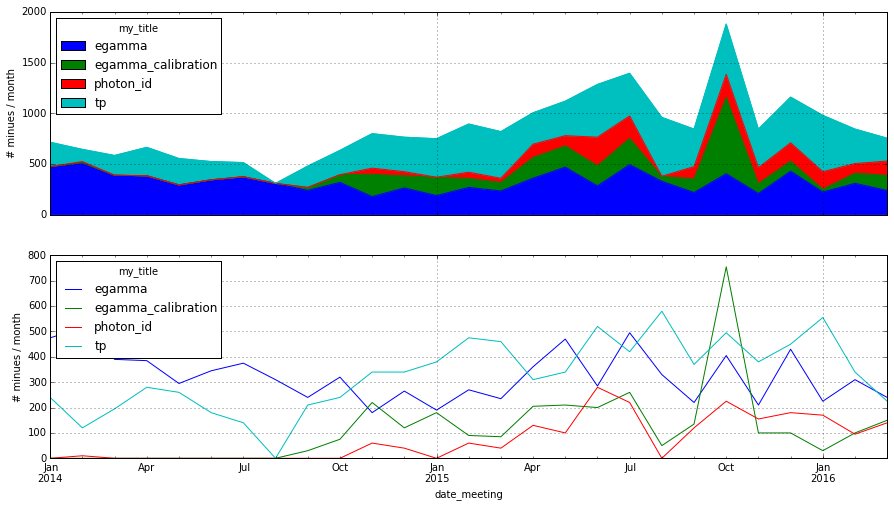

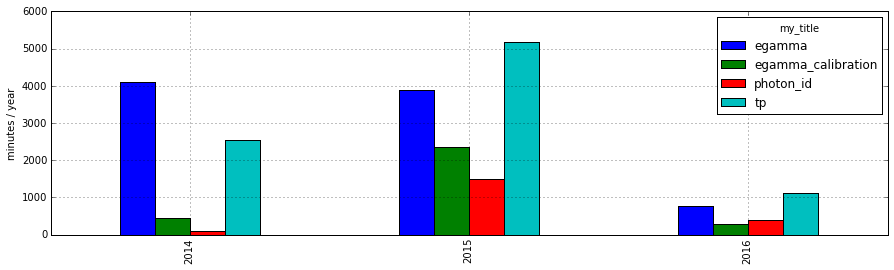

In [450]:
f, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
gr = df.groupby([pd.Grouper(freq='MS',key='date_meeting'), 'my_title'])['duration'].sum().unstack().fillna(0)
gr.plot(kind='area', ax=axs[0])
gr.plot(ax=axs[1])
for ax in axs: ax.set_ylabel('# minues / month')
    
f, ax = plt.subplots(figsize=(15, 4))
df.groupby([df_meeting['date_meeting'].dt.year, 'my_title'])['duration'].sum().unstack().fillna(0).plot(kind='bar', ax=ax)

ax.set_ylabel('minutes / year')
plt.show()    

## Number of contributions per meeting
Including introductions. Do not count meetings with 0 contributions.

mean                           std                    
                        2014      2015      2016      2014      2015      2016
my_title                                                                      
egamma              5.704545  5.187500  3.666667  1.983414  2.531976  1.370689
egamma_calibration  3.250000  3.742857  2.833333  1.281740  2.726157  1.329160
photon_id           2.333333  3.809524  3.285714  1.527525  1.327368  1.112697
tp                  3.421053  6.062500  6.545455  1.686698  2.970824  3.724611

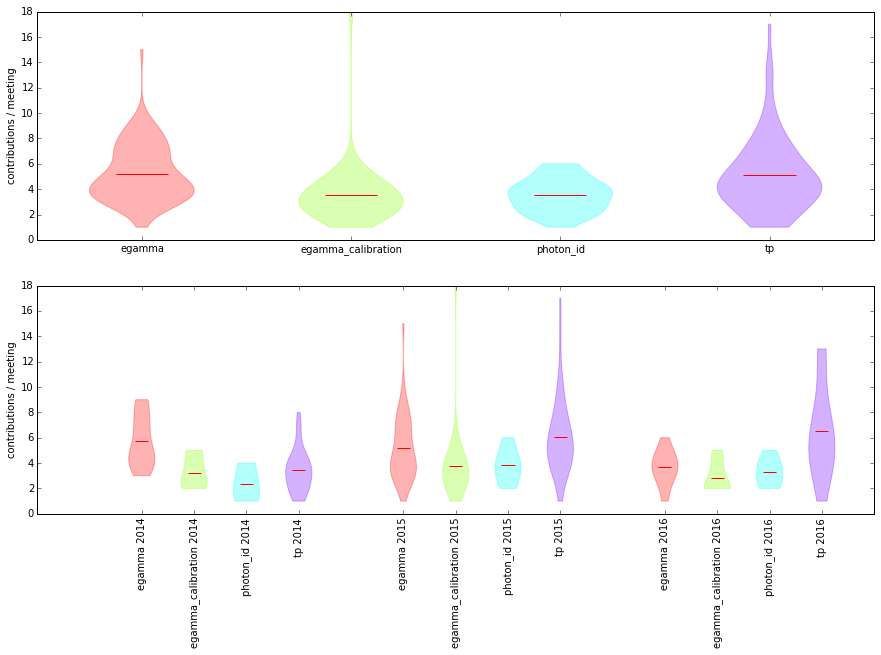

In [414]:
f, axs = plt.subplots(2, 1, figsize=(15, 9), sharey=True)

violins = axs[0].violinplot([v.as_matrix() for k, v in df_meeting_grouped_by_mytitle_not_null['contributions']], showextrema=False, showmeans=True)
keys = [k for k, v in df_meeting_grouped_by_mytitle['contributions']]
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(keys.index(k) / float(len(keys))))
axs[0].set_xticks(np.arange(1, len(keys) + 1))
axs[0].set_xticklabels(keys)
axs[0].set_ylabel('contributions / meeting')

gr = df_meeting[df_meeting['contributions'] > 0].groupby(('my_title', df_meeting['date_meeting'].dt.year))['contributions']
keys = [k for k, v in gr]
title_keys = list(np.unique([k[0] for k in keys]))
years_keys = list(np.unique([k[1] for k in keys]))
pos = [years_keys.index(k[1]) * (len(title_keys) + 1) + title_keys.index(k[0]) for k in keys]
violins = axs[1].violinplot([v.as_matrix() for k, v in gr], showextrema=False, showmeans=True, positions=pos)
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(title_keys.index(k[0]) / float(len(title_keys))))
axs[1].set_xticks(pos)
axs[1].set_xticklabels([' '.join(map(str, k)) for k in keys], rotation='vertical')
axs[1].set_ylabel('contributions / meeting')
gr.aggregate(['mean', 'std']).unstack()

## Meeting duration
Including introductions. Do not count meetings with 0 contributions.

duration                                                \
                         mean                                std              
level_2                  2014        2015        2016       2014       2015   
my_title                                                                      
egamma              93.068182   81.270833   64.583333  33.501404  43.813793   
egamma_calibration  55.625000   67.714286   46.666667  27.958835  71.004793   
photon_id           36.666667   71.904762   57.857143  25.166115  25.810666   
tp                  66.973684  107.916667  101.818182  33.882537  35.532924   

                               
                               
level_2                  2016  
my_title                       
egamma              26.496855  
egamma_calibration  26.583203  
photon_id           25.307631  
tp                  66.455727

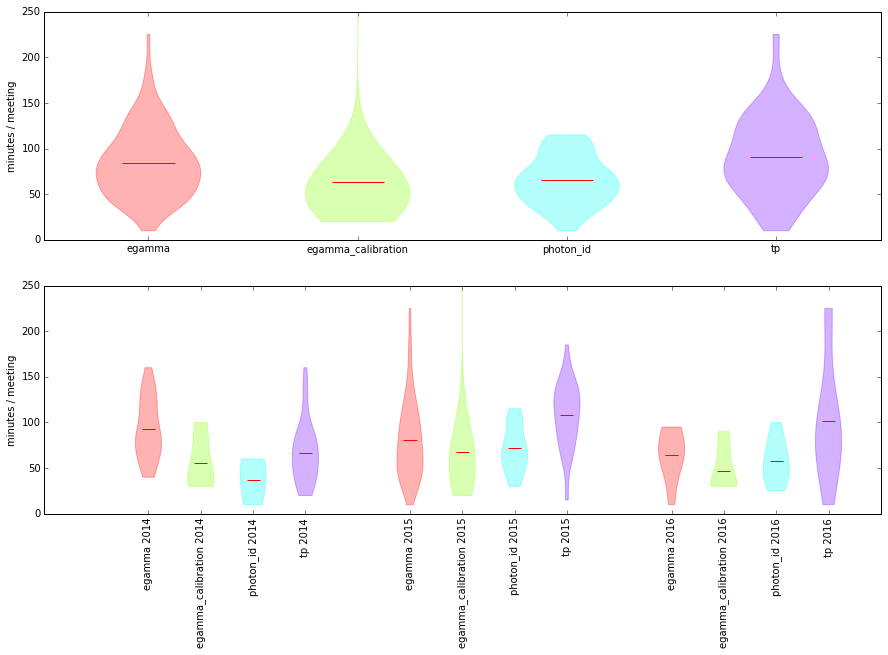

In [417]:
f, axs = plt.subplots(2, 1, figsize=(15, 9), sharey=True)

gr = df.groupby(['my_title', 'id_meeting'])["duration", 'my_title'].sum().reset_index().groupby('my_title')['duration']
violins = axs[0].violinplot([v.as_matrix() for k, v in gr], showextrema=False, showmeans=True)
keys = [k for k, v in df_meeting_grouped_by_mytitle['contributions']]
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(keys.index(k) / float(len(keys))))
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(keys)
axs[0].set_ylabel('minutes / meeting')
axs[0].set_ylim(0, 300)


gr = df.groupby(('my_title', 'id_meeting', df['date_meeting'].dt.year))["duration", 'my_title'].sum()
gr = gr.reset_index().groupby(('my_title', 'level_2'))
keys = [k for k, v in gr]
title_keys = list(np.unique([k[0] for k in keys]))
years_keys = list(np.unique([k[1] for k in keys]))
pos = [years_keys.index(k[1]) * (len(title_keys) + 1) + title_keys.index(k[0]) for k in keys]
violins = axs[1].violinplot([v['duration'].as_matrix() for k, v in gr], showextrema=False, showmeans=True, positions=pos)

for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(title_keys.index(k[0]) / float(len(title_keys))))
axs[1].set_xticks(pos)
axs[1].set_xticklabels([' '.join(map(str, k)) for k in keys], rotation='vertical')
axs[1].set_ylabel('minutes / meeting')
axs[1].set_ylim(0, 250)

gr.aggregate(['mean', 'std']).unstack()

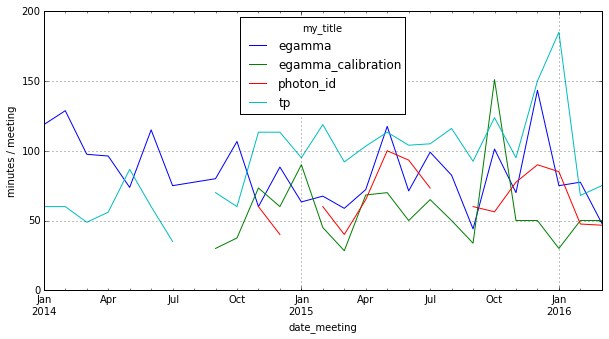

In [228]:
s =df.groupby(['date_meeting', 'my_title'])["duration"].sum().unstack()
s['date_meeting'] = s.index
ax = s.groupby(pd.Grouper(freq='1MS',key='date_meeting')).mean().plot(figsize=(10, 5))
ax.set_ylabel('minutes / meeting')

In [ ]:
f, axs = plt.subplots((len(df_grouped_by_group), 1), figsize=(15, 7))
for ax, (group, df_group) in zip(axs.flat, df_grouped_by_group):
    df_group.groupby([pd.Grouper(freq='1MS',key='date_meeting'), 'my_title'])['duration'].sum().unstack().fillna(0).plot(kind='area', ax=ax)
    ax.set_ylabel('minutes / month')
    ax.set_xlabel('date meeting')
    ax.set_title(group)

min_x = np.min([ax.get_xlim()[0] for ax in axs.flat])
max_x = np.max([ax.get_xlim()[1] for ax in axs.flat])

for ax in axs.flat:
    print ax.get_xlim()
    #ax.set_xlim(min_x, max_x)

plt.tight_layout()
plt.show()    

## Total number of people who made a talk
Only 1 person is counted for each talk (the first). Introduction (matching "Introduction" case insensitive) talk are not considered.

In [477]:
mask_introduction = df.apply(lambda x: 'introduction' in x['title_contribution'].lower(), axis=1)
no_intro = df[np.logical_not(mask_introduction)]
pd.DataFrame(no_intro.groupby([no_intro['date_meeting'].dt.year])['speaker'].nunique())

,speaker
2014,117
2015,124
2016,57


,2014,2015,2016
my_title,,,
egamma,92,82,23
egamma_calibration,11,21,6
photon_id,4,18,7
tp,43,48,28


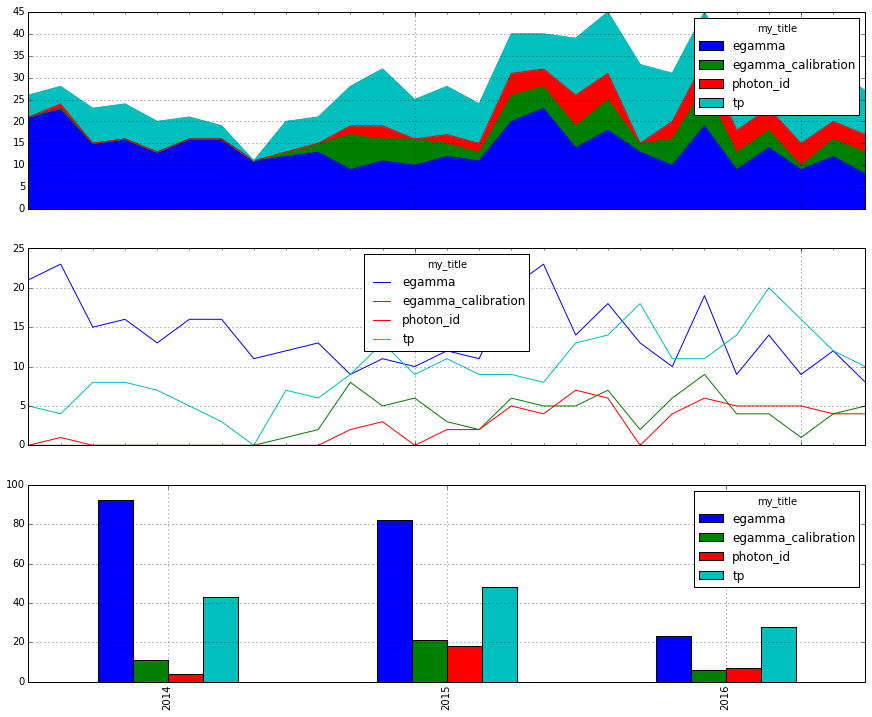

In [494]:
fig, axs = plt.subplots(3, 1, figsize=(15, 12))
no_intro.groupby([no_intro['date_meeting'].dt.year, 'my_title'])['speaker'].nunique().unstack().plot(kind='bar', ax=axs[2])
no_intro.groupby([pd.Grouper(freq='1MS',key='date_meeting'), 'my_title'])['speaker'].unique().apply(lambda x: len(x)).unstack().plot(ax=axs[0], kind='area')
no_intro.groupby([pd.Grouper(freq='1MS',key='date_meeting'), 'my_title'])['speaker'].unique().apply(lambda x: len(x)).unstack().fillna(0).plot(ax=axs[1])

no_intro.groupby(['my_title', no_intro['date_meeting'].dt.year])['speaker'].nunique().unstack()


## Minutes of talks per person
Only 1 person is counted for each talk (the first). Introduction (matching "Introduction" case insensitive) talk are not considered.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x39e5a5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x39c3dc50>]], dtype=object)

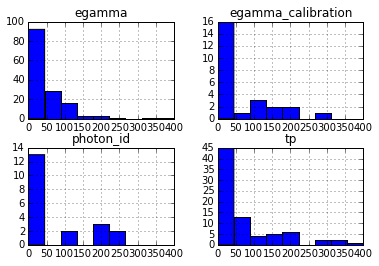

In [588]:
duration_per_person = pd.DataFrame(no_intro.groupby(['speaker', 'my_title'])['duration', 'my_title'].sum()).unstack()['duration']
duration_per_person.hist(bins=np.linspace(0, 400, 10))

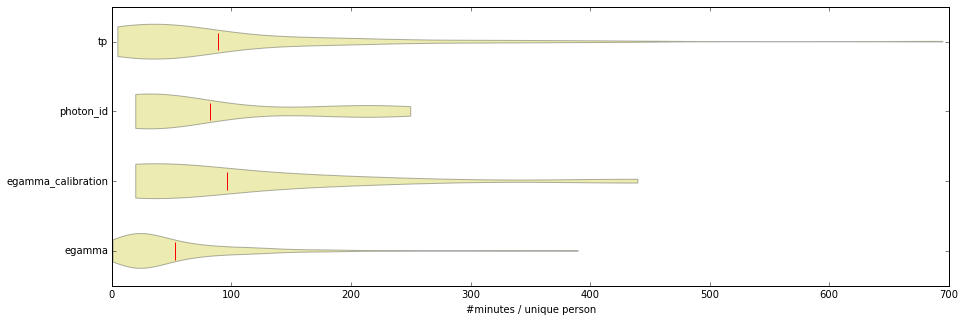

In [622]:
fig, ax = plt.subplots(figsize=(15, 5))
d = {}
for k, v in no_intro.groupby(['my_title', 'speaker'])['duration'].sum().reset_index().groupby('my_title')['duration']:
    d[k] = v.as_matrix()
ax.violinplot(d.values(), showmeans=True, showextrema=False, vert=False)
ax.set_yticks(range(1, len(d) + 1))
ax.set_yticklabels(d.keys())
ax.set_xlabel('#minutes / unique person')

## Most common words
From the title of the contributions, excluding commong words

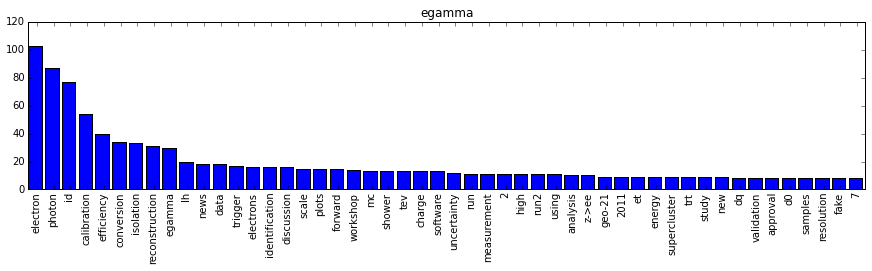

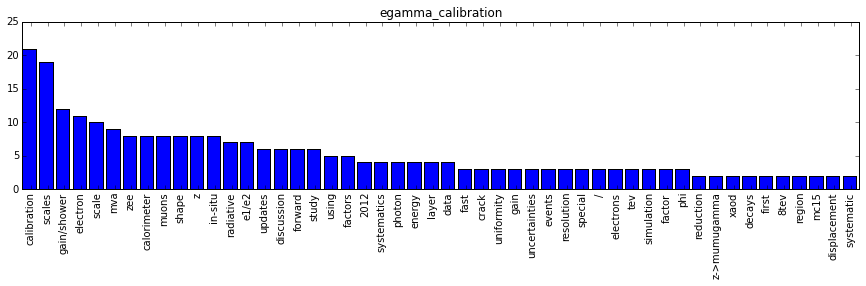

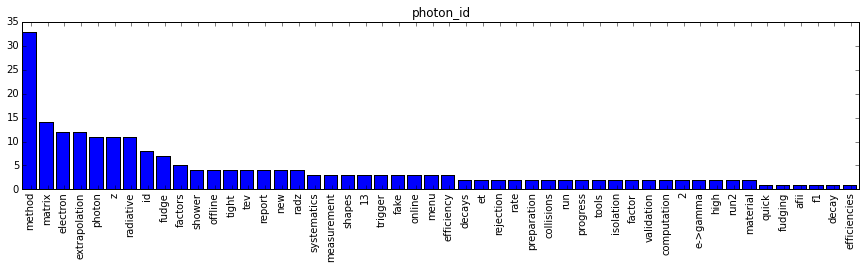

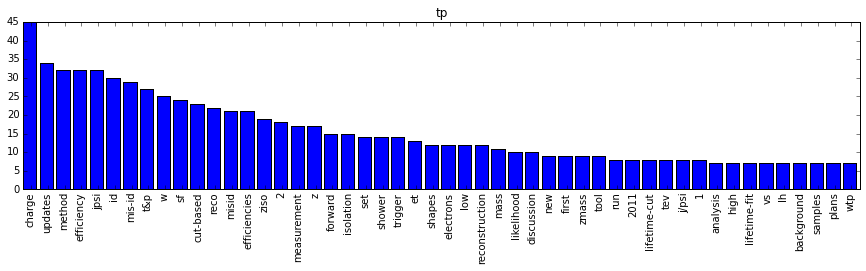

In [627]:
from collections import Counter
common_words = 'update introduction on -> with for - in ; : & the of and from at a to from by an studies status'.split()

for k, v in df.groupby('my_title')['title_contribution']:
    words = v.apply(lambda x: x.lower()).apply(lambda x: x.split()).sum()
    words = filter(lambda x: x not in common_words, words)
    words = [w.strip(',.;-_') for w in words]

    histo_words = Counter(words)
    #print "==", k
    #for kk, vv in histo_words.most_common(100):
    #    print "%s: %d" % (kk, vv)
    values = np.array(histo_words.values())
    labels = np.array(histo_words.keys())
    idx = np.argsort(values)[::-1]
    
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(np.arange(50), values[idx][:50])
    ax.set_xticklabels(labels[idx][:100], rotation=90)
    ax.set_xticks(np.arange(50) + 0.5)
    ax.set_title(k)
plt.show()

In [ ]:
for group, df_group in df_grouped_by_group:
    g = df_group.groupby('my_title')['speaker', 'duration', 'title_contribution']
    for k, v in g:
        f, ax = plt.subplots(figsize=(16, 5))
        mask_introduction = v.apply(lambda x: 'introduction' in x['title_contribution'].lower(), axis=1)
        no_intro = v[np.logical_not(mask_introduction)].groupby('speaker')['duration'].sum().sort('duration', inplace=False, ascending=False)
        intro = v[mask_introduction].groupby('speaker')['duration'].sum()
        intro_values = [intro.get(name, 0) for name in no_intro.keys()]
        d = pd.DataFrame(no_intro)
        d['duration_intro'] = intro_values
        d[:50].plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel('minutes')
        ax.set_title(k)


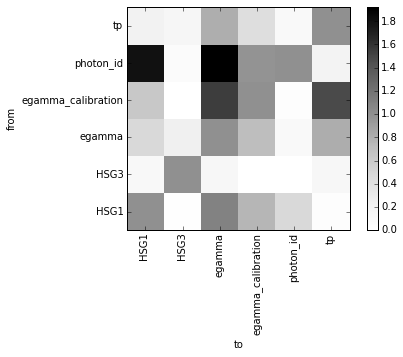

In [62]:
gr = df.groupby(['speaker', 'my_title'])['duration'].sum().unstack().fillna(0)
columns = gr.columns
result = np.zeros((len(columns), len(columns)))
for icol1, col1 in enumerate(columns):
    gr_col1 = gr[gr[col1] > 0]
    for icol2, col2 in enumerate(columns):
        m = np.mean(gr_col1[col2] / gr_col1[col1])
        result[icol1, icol2] = m

fig, ax = plt.subplots()
p = ax.pcolormesh(result, vmin=0, cmap='Greys')
ax.set_xticklabels(columns, rotation=90)
ax.set_yticklabels(columns)
ax.set_xticks(np.arange(len(columns)) + 0.5)
ax.set_yticks(np.arange(len(columns)) + 0.5)
ax.set_aspect('equal')
ax.set_ylabel('from')
ax.set_xlabel('to')
fig.colorbar(p)
plt.show()

In [ ]:
for group, group_data in df_grouped_by_group:
    speaker_summary = group_data.groupby(['speaker', 'my_title'])['duration'].sum().unstack().fillna(0)
    speaker_summary.drop('NO SPEAKER', inplace=True)
    speaker_summary.drop('ALL', inplace=True)
    if 'egamma' in speaker_summary.columns:
        speaker_summary.drop('egamma', axis=1, inplace=True)
    columns = speaker_summary.columns
    fraction_columns = ['fraction_' + c for c in columns]
    for column in columns:
        speaker_summary['fraction_' + column] = speaker_summary[column] / speaker_summary.sum(axis=1)
    speaker_summary['uniformity'] = speaker_summary[fraction_columns].std(axis=1)
    speaker_summary.sort('uniformity', ascending=True, inplace=True)
    speaker_summary
    to_plot = speaker_summary[columns][:40]

    to_plot.plot(kind='bar', stacked=True, figsize=(18, 5))

In [ ]:
mask_introduction = df.apply(lambda x: 'introduction' in x['title_contribution'].lower(), axis=1)
df_no_introduction = df[np.logical_not(mask_introduction)]
df_grouped_by_group_no_introduction = df_no_introduction.groupby('group')
for group, group_data in df_grouped_by_group_no_introduction:
    g = group_data.groupby('speaker')['duration'].sum().sort(inplace=False, ascending=False)
    top_user = g[:10].keys()
    top_user_mask = [vv in top_user for vv in group_data['speaker']]
    g = group_data[top_user_mask].groupby([pd.Grouper(freq='MS',key='date_meeting'), 'speaker'])['duration'].sum().unstack()
    g_others = group_data[np.logical_not(top_user_mask)].groupby([pd.Grouper(freq='MS',key='date_meeting'), 'speaker'])['duration'].sum().unstack().sum(axis=1)
    g['others'] = g_others
    g.plot(kind='area', stacked=True, figsize=(16, 6))

In [ ]:
ax = df.groupby(['date_meeting', 'my_title'])["duration"].sum().unstack('my_title').plot(kind='box')
ax.set_title('duration')